# Benchmark for query algorthms

## 1. getting the data

In [1]:
## /!\ to be executed only once 
import sys
sys.path.insert(0, "..")

In [2]:
from wordtraveller import filemanager as fm
filemanager = fm.FileManager('allDocs' , '../workspace/'  )
Voc = filemanager.read_vocabulary()

print(len(Voc))

325354


In [3]:
print(Voc.pop("***NumberDifferentDocs***"))

131896


## 2. vocabulary analysis 
### a) gets the ten most frequent words

In [4]:
from sortedcontainers import SortedDict
worldsFreq = [0]*len(Voc)
priviousOffset = 0 
first = True
for i, world in enumerate(Voc): 
    worldsFreq[i] = (int(Voc[world]) -priviousOffset, world )
    priviousOffset = int(Voc[world])
worldsFreq.sort(reverse=True)
print(worldsFreq[0:10])

[(131997, '-'), (113786, '<number>'), (85006, 'said'), (62077, 'one'), (55571, 'two'), (54144, '--'), (52693, 'would'), (51461, 'also'), (50276, 'last'), (47889, 'new')]


### b) Zipf's low

In [5]:
import matplotlib.pyplot as plt

freqs = [0]*len(Voc)
priviousOffset = 0 
for i, world in enumerate(Voc): 
    freqs[i] = (Voc[world]) -priviousOffset
    priviousOffset = int(Voc[world])
    
freqs.sort(reverse=True)

plt.plot(freqs)
plt.ylabel('fréquence mot')
plt.xscale('log')
plt.yscale('log')
plt.show()

<Figure size 640x480 with 1 Axes>

on peut classer les mot de la façon suivante: 

heighFreq = worldsFreq[10:100] # 50 000 > x > 15 000
middelFreq = worldsFreq[1000:5000] # 4500 > x > 800 
lowFreq =worldsFreq[50000: 150000] # 17 > x > 2 




## 3. Evaluation des performances 
### a) analyse de l'evalusiont du temps de calcule en fonction du nombre de resutat attenu

fonction nessaire préalablement

In [6]:
def moyenne(tableau):
    return sum(tableau, 0.0) / len(tableau)

def variance(tableau):
    m=moyenne(tableau)
    return moyenne([(x-m)**2 for x in tableau])

def ecartype(tableau):
    return variance(tableau)**0.5

def confiance(tableau,iteration):
    return ecartype(tableau)*2*1.96/(iteration**0.5)

In [15]:
## definition del'experiance 

nbIter = 150
#List de liste de mots qui sera annanliser
listOfWords = [[tuple[1]for tuple in worldsFreq[100:105]]for i in range(0, nbIter)]

# nombre de mesure a éféctuer 
size = 10

#Fonction qui a la énieme mesure associe la k=f(n) ou k est le nombre de document a casser 
def f(n): 
    return n

In [8]:
from wordtraveller import query
from wordtraveller import faginstavf, faginstopkvf, naivetopk
from sys import stdout
import time 






totaleTimeTA = [[0]*len(listOfWords) for i in range(0,size)]
totaleTimeNaiv = [[0]*len(listOfWords) for i in range(0,size)]
totaleTimefag = [[0]*len(listOfWords) for i in range(0,size)]




for i,words in enumerate(listOfWords):
    for k in range(0,size):
        print("{}% ".format(round((i*size+k)/(len(listOfWords)*size)*100)), end="\r")
        sartingTime = time.time()
        resutle = faginstavf.apply_fagins_ta(words, Voc, filemanager, 0, f(k))
        totaleTimeTA[k][i] = time.time() - sartingTime

        sartingTime = time.time()
        resutle = faginstopkvf.apply_top_k_algo(words, Voc, filemanager, 0, f(k))
        totaleTimefag[k][i] = time.time() - sartingTime

        sartingTime = time.time()
        naivetopk.apply_naive_top_k_algo(words, Voc, filemanager, 0,f(k) )
        totaleTimeNaiv[k][i] = time.time() - sartingTime
        
print("finiched", end="\r")



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adril\AppData\Local\Temp...
[nltk_data]   Package stopwords is already up-to-date!


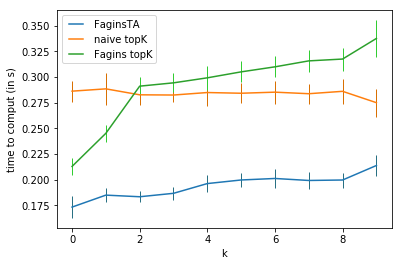

In [16]:
totaleTimeTAAvg = [0]*size
totaleTimeNaivAvg = [0]*size
totaleTimefagAvg = [0]*size

totaleTimeTAAConf = [0]*size
totaleTimeNaivConf = [0]*size
totaleTimefagConf = [0]*size


for k in range(0,size):
    totaleTimeTAAvg[k]= moyenne(totaleTimeTA[k])
    totaleTimeNaivAvg[k]= moyenne(totaleTimeNaiv[k])
    totaleTimefagAvg[k]= moyenne(totaleTimefag[k])
    
    totaleTimeTAAConf[k]= confiance(totaleTimeTA[k],nbIter)
    totaleTimeNaivConf[k]= confiance(totaleTimeNaiv[k],nbIter)
    totaleTimefagConf[k]= confiance(totaleTimefag[k],nbIter)
    

x = [0]*size
for i in range(1,size): 
    x[i] = f(i)
    

plt.plot(x,totaleTimeTAAvg, label="FaginsTA ")
plt.errorbar(x, totaleTimeTAAvg, yerr = totaleTimeTAAConf, color = '#297083', ls='none', lw = 1, capthick = 2)
plt.plot(x,totaleTimeNaivAvg, label="naive topK ")
plt.errorbar(x, totaleTimeNaivAvg, yerr = totaleTimeNaivConf, color = '#D97003', ls='none', lw = 1, capthick = 2)
plt.plot(x,totaleTimefagAvg, label="Fagins topK")
plt.errorbar(x, totaleTimefagAvg, yerr = totaleTimefagConf, color = '#32CD32', ls='none', lw = 1, capthick = 2)

plt.ylabel('time to comput (in s)')
plt.xlabel('k')
plt.legend(numpoints=2)
plt.show()

### b) analyse de l'évolution du temps de calcul en fonction du nombre de mot dans la recherche 

In [17]:
#Definition de l'experiance 

# define nition de la la liste de liste de mots a annalyser 
WordsList= [0]*1024
for i in range(0,1024): 
    WordsList[i]= worldsFreq[10000+i][1]
WordsList.sort(reverse=True)

# nombre d'iteration de l'experiance 
nbIter = 15

#nombre de mesure 
size = 20

def f(k): 
    return k*k

In [10]:
from wordtraveller import query
from wordtraveller import faginstavf, faginstopkvf, naivetopk
from sys import stdout
import time 



totaleTimeTAWords = [[0]*nbIter for i in range(0,size)]
totaleTimefagWords = [[0]*nbIter for i in range(0,size)]
totaleTimeNaivWords = [[0]*nbIter for i in range(0,size)]


for i in range(0,nbIter):
    for n in range(0,size):
        words = WordsList[0:f(n)]
        print("{}% ".format(round((n+i*nbIter)/(size*nbIter)*100)), end="\r")
        sartingTime = time.time()
        resutle = faginstavf.apply_fagins_ta(words, Voc, filemanager, 0, 30)
        totaleTimeTAWords[n][i] = time.time() - sartingTime

        sartingTime = time.time()
        resutle = faginstopkvf.apply_top_k_algo(words, Voc, filemanager, 0, 30)
        totaleTimefagWords[n][i] = time.time() - sartingTime

        sartingTime = time.time()
        naivetopk.apply_naive_top_k_algo(words, Voc, filemanager, 0, 30)
        totaleTimeNaivWords[n][i] = time.time() - sartingTime
        
print("finiched", end="\r")


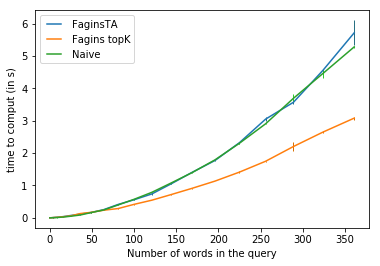

In [18]:
totaleTimeTAWordsAvg = [0]*size
totaleTimefagWordsAvg = [0]*size
totaleTimeNaivWordsAvg = [0]*size


totaleTimeTAAWordsConf = [0]*size
totaleTimefagWordsConf = [0]*size
totaleTimeNaivWordsConf = [0]*size



for k in range(0,size):
    totaleTimeTAWordsAvg[k]= moyenne(totaleTimeTAWords[k])
    totaleTimefagWordsAvg[k]= moyenne(totaleTimefagWords[k])
    totaleTimeNaivWordsAvg[k]= moyenne(totaleTimeNaivWords[k])
    
    totaleTimeTAAWordsConf[k]= confiance(totaleTimeTAWords[k],nbIter)
    totaleTimefagWordsConf[k]= confiance(totaleTimefagWords[k],nbIter)
    totaleTimeNaivWordsConf[k]= confiance(totaleTimeNaivWords[k],nbIter)

x = [0]*size
for i in range(1,size): 
    x[i] = f(i)
    


plt.plot(x,totaleTimeTAWordsAvg, label="FaginsTA")
plt.errorbar(x, totaleTimeTAWordsAvg, yerr = totaleTimeTAAWordsConf, color = '#297083', ls='none', lw = 1, capthick = 2)
plt.plot(x,totaleTimefagWordsAvg, label="Fagins topK")
plt.errorbar(x, totaleTimefagWordsAvg, yerr = totaleTimefagWordsConf, color = '#D97003', ls='none', lw = 1, capthick = 2)
plt.plot(x,totaleTimeNaivWordsAvg, label="Naive")
plt.errorbar(x, totaleTimeNaivWordsAvg, yerr = totaleTimeNaivWordsConf, color = '#32CD32', ls='none', lw = 1, capthick = 2)

plt.ylabel('time to comput (in s)')
plt.xlabel('Number of words in the query')
plt.legend(numpoints=2)
plt.show()

### c) analyse de l'évolution du temps de calcul en fonction de la tailles des posting lists

In [19]:
#Definition de l'experiance 

#Nombre de mesures a effectuer. 
size = 15
#nombre d'itération des messure. 
nbIter = 150
#Nombre de mots par requets. 
nbOfwords = 2

#fonction qui a la ieme mesure associe le nombre n=f(i) de document que l'on souhétes voire appartére dans la posting list. 
def f(i): 
    return i*i*100

# define words 
ListWorlds = [[0] * nbOfwords for _ in range(size)]
for i in range(1,size+1): 
    ListWorlds[i-1] = [world[1] for world in worldsFreq if world[0]>=f(i) and world[0]<=f(i)*1.10][0:nbOfwords]
    if len(ListWorlds[i-1])!= nbOfwords : 
            print ("Le jeux de donnée n'est pas reproésentatife in faut changer les paramters")
            print ("les mots de taille {} poesent probleme seul {} / {}".format(f(i),len(ListWorlds[i-1]),nbOfwords ))
#print (ListWorlds)


In [12]:
from wordtraveller import query
from wordtraveller import faginstavf, faginstopkvf,naivetopk
import time 




totaleTimeTAPL = [[0]*nbIter for i in range(0,size)]
totaleTimeNaivPL = [[0]*nbIter for i in range(0,size)]
totaleTimefagPL = [[0]*nbIter for i in range(0,size)]


for k in range(0,nbIter):
    for n in range(0,size):
        print("{}% ".format(round((k*size+n)/(nbIter*size)*100)), end="\r")
        words = ListWorlds[n]




        sartingTime = time.time()
        faginstavf.apply_fagins_ta(words, Voc, filemanager, 0, 15)
        totaleTimeTAPL[n][k] = time.time() - sartingTime

        sartingTime = time.time()
        faginstopkvf.apply_top_k_algo(words, Voc, filemanager, 0, 15)
        totaleTimefagPL[n][k] = time.time() - sartingTime

        sartingTime = time.time()
        naivetopk.apply_naive_top_k_algo(words, Voc, filemanager, 0, 15 )
        totaleTimeNaivPL[n][k] = time.time() - sartingTime
print("finiched", end="\r")




[0, 100, 400, 900, 1600, 2500, 3600, 4900, 6400, 8100, 10000, 12100, 14400, 16900, 19600]


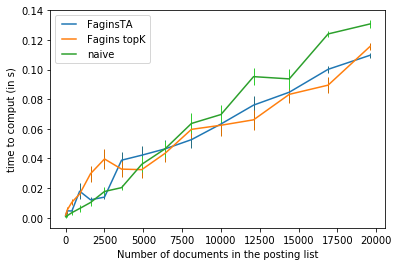

In [20]:
totaleTimeTAPLAvg = [0]*size
totaleTimefagPLAvg = [0]*size
totaleTimeNaivPLAvg = [0]*size

confianceTotaleTimeTAPL = [0]*size
confianceTimefagPL = [0]*size
confianceTimeNaivPL = [0]*size

for k in range(0,size):
    totaleTimeTAPLAvg[k]= moyenne(totaleTimeTAPL[k])
    totaleTimefagPLAvg[k]= moyenne(totaleTimefagPL[k])
    totaleTimeNaivPLAvg[k]= moyenne(totaleTimeNaivPL[k])

for k in range(0,size):
    confianceTotaleTimeTAPL[k]= confiance(totaleTimeTAPL[k],nbIter)
    confianceTimefagPL[k]= confiance(totaleTimefagPL[k],nbIter)
    confianceTimeNaivPL[k]= confiance(totaleTimeNaivPL[k],nbIter)

x = [0]*size
for i in range(1,size): 
    x[i] = f(i)

print (x)
plt.plot(x,totaleTimeTAPLAvg, label="FaginsTA")
plt.errorbar(x, totaleTimeTAPLAvg, yerr = confianceTotaleTimeTAPL, color = '#297083', ls='none', lw = 1, capthick = 2)
plt.plot(x,totaleTimefagPLAvg, label="Fagins topK") 
plt.errorbar(x, totaleTimefagPLAvg, yerr = confianceTimefagPL, color = '#D97003', ls='none', lw = 1, capthick = 2)
plt.plot(x,totaleTimeNaivPLAvg, label="naive")
plt.errorbar(x, totaleTimeNaivPLAvg, yerr = confianceTimeNaivPL, color = '#32CD32', ls='none', lw = 1, capthick = 2)


plt.ylabel('time to comput (in s)')
plt.xlabel('Number of documents in the posting list')
plt.legend(numpoints=2)

plt.show()



### d) analyse de l'evalusiont du temps de calcule en fonction de epsilon pour TA

In [21]:
#definition de l'experiance 

#nombre d'iteration de l'experiances 
nbIter= 200


listOfWords = [[tuple[1]for tuple in worldsFreq[500:510]] for i in range(0,nbIter)]





# nombre de mesures 
size = 20

def f(k,size): 
    return k/3/size


In [22]:
from wordtraveller import query
from wordtraveller import faginstavf, faginstopkvf, naivetopk
from sys import stdout
import time 






totaleTimeTAE = [[0]*len(listOfWords) for i in range(0,size)]



for i,words in enumerate(listOfWords):
    for k in range(0,size):
        
        print("{}% ".format(round((i*size+k)/(len(listOfWords)*size)*100)), end="\r")
        sartingTime = time.time()
        resutle = faginstavf.apply_fagins_ta(words, Voc, filemanager, f(k,size), 20)
        totaleTimeTAE[k][i] = time.time() - sartingTime

        
print("finiched", end="\r")



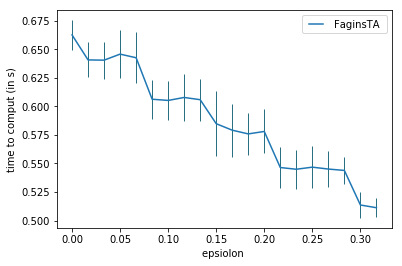

In [23]:
totaleTimeTAEAvg = [0]*size
totaleTimeTAEConfiance = [0]*size
for k in range(0,size):
    totaleTimeTAEAvg[k]= moyenne(totaleTimeTAE[k])
    totaleTimeTAEConfiance[k]= confiance(totaleTimeTAE[k], len(listOfWords))

x = [0]*size
for i in range(1,size): 
    x[i] = f(i,size)
    

plt.plot(x,totaleTimeTAEAvg, label="FaginsTA ")
plt.errorbar(x, totaleTimeTAEAvg, yerr = totaleTimeTAEConfiance, color = '#297083', ls='none', lw = 1, capthick = 2)


plt.ylabel('time to comput (in s)')
plt.xlabel('epsiolon ')
plt.legend(numpoints=2)
plt.show()